# Historischer Temperaturverlauf auf dem Hohen Peißenberg, Bayern, Deutschland

Für den Hohen Peißenberg liegen Wetterdaten ab 1781 vor, was ihm in den Datenarchiven des Deutschen Wetterdienstes eine Sonderstellung gibt.

Im Folgenden sollen die historischen Tagesmittelwerte, die bis auf wenige Tage kontinuierlich aufgezeichnet worden sind, graphisch ausgewertet werden.

In [38]:
# load libraries
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt

### Daten aus dem GitHub Repo laden

In [39]:
# URL definieren
data_url = 'https://raw.githubusercontent.com/docdiesel/climatechange/master/data/produkt_klima_tag_17810101_20181231_02290.txt'


In [40]:
# Daten abrufen; muss http Response 200 ergeben
r = requests.get(data_url)
r

<Response [200]>

In [41]:
# CSV aus dem Content extrahieren und erste Bytes zur Kontrolle ausgeben
s = r.content
print(s[0:250])

b'STATIONS_ID;MESS_DATUM;QN_3;  FX;  FM;QN_4; RSK;RSKF; SDK;SHK_TAG;  NM; VPM;  PM; TMK; UPM; TXK; TNK; TGK;eor\r\n       2290;17810101;-999;-999;-999;    2;   0.0;   0;-999;-999;  -999;  -999;  899.10;    3.3;-999;   -999;   -999;-999;eor\r\n       2290;1'


In [42]:
# Pandas DataFrame aus CSV erzeugen
df = pd.read_csv(io.StringIO(s.decode('utf-8')), sep=';')
df.head(5)

,STATIONS_ID,MESS_DATUM,QN_3,FX,FM,QN_4,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,eor
0,2290,17810101,-999,-999.0,-999.0,2,0.0,0,-999.0,-999,-999.0,-999.0,899.1,3.3,-999.0,-999.0,-999.0,-999.0,eor
1,2290,17810102,-999,-999.0,-999.0,2,0.0,0,-999.0,-999,-999.0,-999.0,891.8,0.3,-999.0,-999.0,-999.0,-999.0,eor
2,2290,17810103,-999,-999.0,-999.0,2,0.0,0,-999.0,-999,-999.0,-999.0,890.4,-4.7,-999.0,-999.0,-999.0,-999.0,eor
3,2290,17810104,-999,-999.0,-999.0,2,4.6,4,-999.0,-999,-999.0,-999.0,896.0,-6.7,-999.0,-999.0,-999.0,-999.0,eor
4,2290,17810105,-999,-999.0,-999.0,2,2.9,4,-999.0,-999,-999.0,-999.0,901.9,-8.8,-999.0,-999.0,-999.0,-999.0,eor


Wichtige Temp.-Messwerte:
* TMK : Tagesmittel der Temperatur
* TNK : Tagesminimum der Lufttemperatur in 2m Hoehe
* TXK : Tagesmaximum der Lufttemperatur in 2m Höhe
* TGK : Minimum der Lufttemperatur am Erdboden in 5cm Hoehe


### Daten anreichern

Für spätere Auswertungen und Experimente werden dem Datensatz einige Spalten hinzugefügt, wie Dekade, Jahr, Jahr&Monat und Monat&Tag.

In [43]:
# Spalten für spätere Auswertungen hinzufügen
df.insert( 1,  'md', df['MESS_DATUM']  %  10000 )
df.insert( 1,  'ym', df['MESS_DATUM'] //    100 )
df.insert( 1,   'y', df['MESS_DATUM'] //  10000 )
df.insert( 1, 'dcd', df['MESS_DATUM'] // 100000 )
df.head(5)

,STATIONS_ID,dcd,y,ym,md,MESS_DATUM,QN_3,FX,FM,QN_4,...,SHK_TAG,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,eor
0,2290,178,1781,178101,101,17810101,-999,-999.0,-999.0,2,...,-999,-999.0,-999.0,899.1,3.3,-999.0,-999.0,-999.0,-999.0,eor
1,2290,178,1781,178101,102,17810102,-999,-999.0,-999.0,2,...,-999,-999.0,-999.0,891.8,0.3,-999.0,-999.0,-999.0,-999.0,eor
2,2290,178,1781,178101,103,17810103,-999,-999.0,-999.0,2,...,-999,-999.0,-999.0,890.4,-4.7,-999.0,-999.0,-999.0,-999.0,eor
3,2290,178,1781,178101,104,17810104,-999,-999.0,-999.0,2,...,-999,-999.0,-999.0,896.0,-6.7,-999.0,-999.0,-999.0,-999.0,eor
4,2290,178,1781,178101,105,17810105,-999,-999.0,-999.0,2,...,-999,-999.0,-999.0,901.9,-8.8,-999.0,-999.0,-999.0,-999.0,eor


Tage ohne Messwert enthalten -999 => in NaN umwandeln, damit diese nicht den Plot verderben

In [44]:
df.loc[df[' TMK'] == -999,' TMK'] = np.nan
df.loc[df[' TXK'] == -999,' TXK'] = np.nan
df.loc[df[' TNK'] == -999,' TNK'] = np.nan
df.loc[df[' TGK'] == -999,' TGK'] = np.nan

Der Datensatz vom Hohen Peißenberg ist fast vollständig. Es fehlen nur für wenige Tage Meßwerte zum Tagesmittel. Die Meßwerte werden im Folgenden nach Jahr gezählt, dies graphisch dargestellt und die lückenhaften Jahre aufgelistet.

In [45]:
df0= df.groupby('y').count()[[' TMK']]
df0.rename(columns={" TMK": "Anzahl Messpunkte"},inplace=True)
df0.head()

,Anzahl Messpunkte
y,
1781,365
1782,365
1783,365
1784,366
1785,365


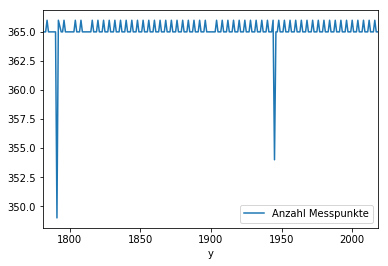

In [46]:
# Line-Plot der Anzahl der Meßwerte; Ausreißer nach unten zeigen fehlende Meßwerte an
ax = df0.reset_index().plot.line(x='y', y='Anzahl Messpunkte', rot=0)

In [47]:
# Auflisten der Jahre mit fehlenden Meßwerten: 1791 & 1945
for index, row in df0.reset_index().iterrows():
    if row['Anzahl Messpunkte'] < 365:
        print(row['y'])

1791
1945


Reinschnuppern in die Daten: Zeige Temp. über erste vier Jahre der Aufzeichnung

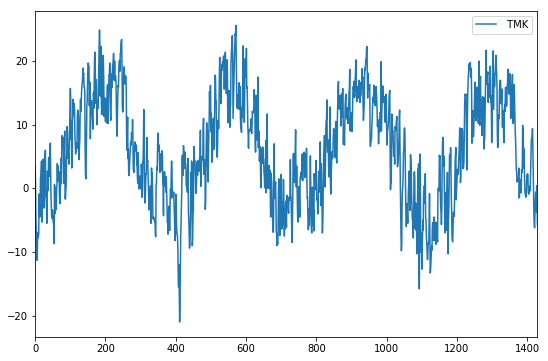

In [48]:
df.iloc[0:1430].plot(kind='line',y=' TMK',figsize=(9,6))

### ISO-Datum erzeugen und als neuen Index setzen

ISO-Datum berechnen yyyymmdd => yyyy-mm-dd und in temp. Array speichern; später zuweisen

In [49]:
temp = []
for index, row in df.iterrows():
    year  = row['y']
    month = row['md']//100
    day   = row['md']%100
    temp.append("{:4d}-{:02d}-{:02d}".format(year,month,day))
df['dt'] = temp

df.head(5)

,STATIONS_ID,dcd,y,ym,md,MESS_DATUM,QN_3,FX,FM,QN_4,...,NM,VPM,PM,TMK,UPM,TXK,TNK,TGK,eor,dt
0,2290,178,1781,178101,101,17810101,-999,-999.0,-999.0,2,...,-999.0,-999.0,899.1,3.3,-999.0,NaN,NaN,NaN,eor,1781-01-01
1,2290,178,1781,178101,102,17810102,-999,-999.0,-999.0,2,...,-999.0,-999.0,891.8,0.3,-999.0,NaN,NaN,NaN,eor,1781-01-02
2,2290,178,1781,178101,103,17810103,-999,-999.0,-999.0,2,...,-999.0,-999.0,890.4,-4.7,-999.0,NaN,NaN,NaN,eor,1781-01-03
3,2290,178,1781,178101,104,17810104,-999,-999.0,-999.0,2,...,-999.0,-999.0,896.0,-6.7,-999.0,NaN,NaN,NaN,eor,1781-01-04
4,2290,178,1781,178101,105,17810105,-999,-999.0,-999.0,2,...,-999.0,-999.0,901.9,-8.8,-999.0,NaN,NaN,NaN,eor,1781-01-05


dt als neuen Index setzen

In [50]:
df.set_index('dt', inplace=True)

### Zeige letzte zwei Jahre mit ISO-Datum

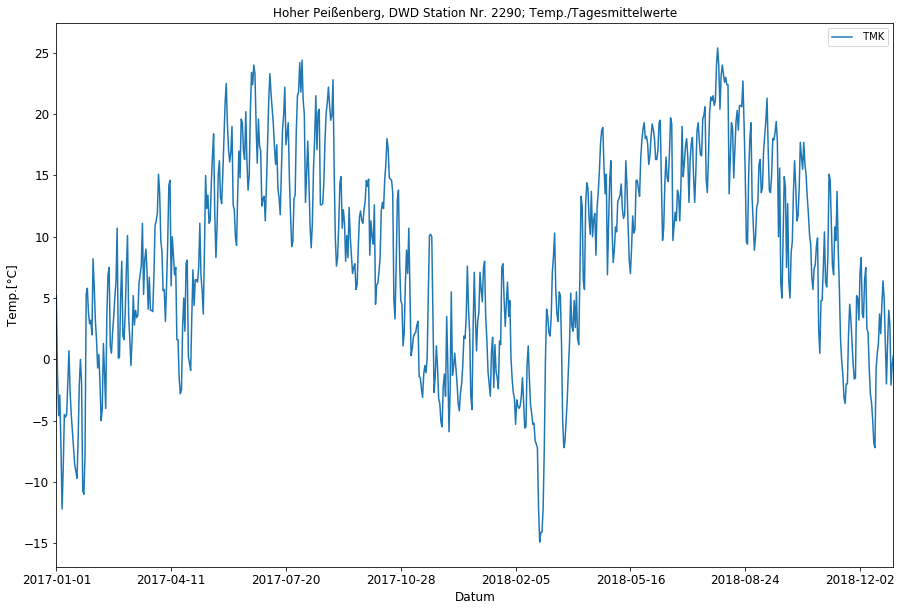

In [51]:
last_row  = df.shape[0]
start_row = last_row-730

ax = df.iloc[start_row:last_row].plot(kind='line', y=' TMK', title ="Hoher Peißenberg, DWD Station Nr. 2290; Temp./Tagesmittelwerte",figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("Datum",fontsize=12)
ax.set_ylabel("Temp.[°C]",fontsize=12)
plt.show()

### Auswertung über Gesamtzeitraum mit gleitendem Durchschnitt über 5 Jahre

Gleitenden Durchschnitt berechnen und an den DataFrame anhängen

In [52]:
df['Tagesmittel über 5a']  = df[' TMK'].rolling(window=5*365,min_periods=5*365-31).mean()
df['Tagesminimum über 5a'] = df[' TNK'].rolling(window=5*365,min_periods=5*365-31).mean()
df['Tagesmaximum über 5a'] = df[' TXK'].rolling(window=5*365,min_periods=5*365-31).mean()
df.tail(5)

,STATIONS_ID,dcd,y,ym,md,MESS_DATUM,QN_3,FX,FM,QN_4,...,PM,TMK,UPM,TXK,TNK,TGK,eor,Tagesmittel über 5a,Tagesminimum über 5a,Tagesmaximum über 5a
dt,,,,,,,,,,,,,,,,,,,,,
2018-12-27,2290,201,2018,201812,1227,20181227,3,5.0,2.3,3,...,911.33,4.0,43.92,9.1,0.4,-2.4,eor,8.536603,5.237753,12.528110
2018-12-28,2290,201,2018,201812,1228,20181228,3,8.7,3.3,3,...,911.89,2.9,59.13,6.0,0.0,-2.4,eor,8.537808,5.238137,12.529260
2018-12-29,2290,201,2018,201812,1229,20181229,3,17.5,4.2,3,...,914.64,-2.1,88.46,0.8,-4.9,-4.5,eor,8.537041,5.236603,12.529315
2018-12-30,2290,201,2018,201812,1230,20181230,3,19.8,7.8,3,...,915.24,-0.4,98.67,0.1,-1.1,-0.9,eor,8.535781,5.236877,12.526192
2018-12-31,2290,201,2018,201812,1231,20181231,3,12.8,6.0,3,...,916.64,0.3,99.88,1.4,-0.6,-0.4,eor,8.533973,5.237096,12.522849


Grafische Auswertung

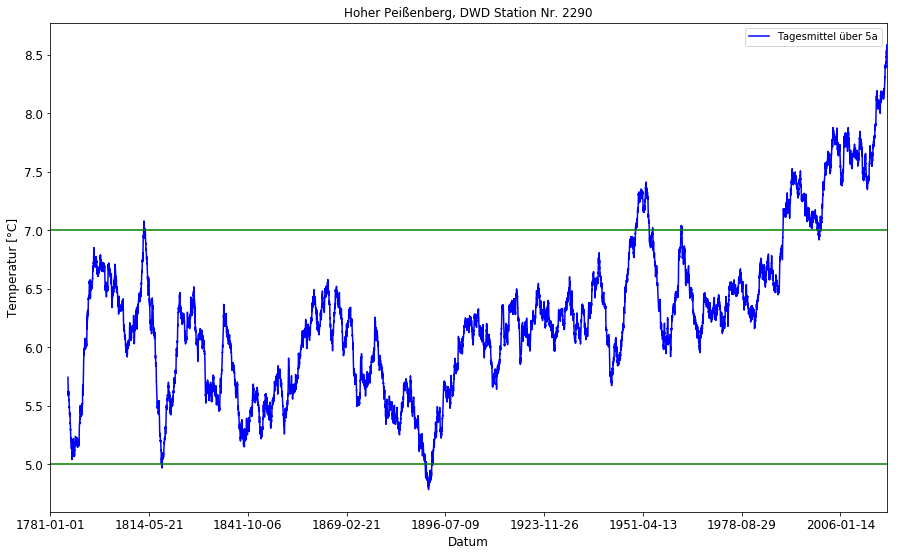

In [53]:
ax2 = df.plot(kind='line',
              y='Tagesmittel über 5a',
              title ="Hoher Peißenberg, DWD Station Nr. 2290",
              figsize=(15,9),
              legend=True,
              color='blue',
              fontsize=12)
ax2.set_xlabel("Datum",fontsize=12)
ax2.set_ylabel("Temperatur [°C]",fontsize=12)
ax2.axhline(y=5.0,color='green')
ax2.axhline(y=7.0,color='green')
plt.show()

Das fünfjährige gleitende Mittel zeigt über den frühen Zeitraum von 1781 bis ca. 1950 ein stetes Schwanken im Raum von 5.0°C bis 7.0°C.
Ab etwa 1970 zeigt sich mit einer Steigung von ca. 0,5°C pro Dekade ein steter Aufwärtstrend, der zu Beginn der 1980er Jahre den alten Schwankungskorridor nach oben durchbricht. 


### Auswertung über Gesamtzeitraum mit Mittelwert pro Dekade

In [54]:
df4= df.groupby('dcd').mean()[[' TMK']]
df4.tail()

,TMK
dcd,
197,6.416922
198,6.739283
199,7.192032
200,7.752423
201,8.031731


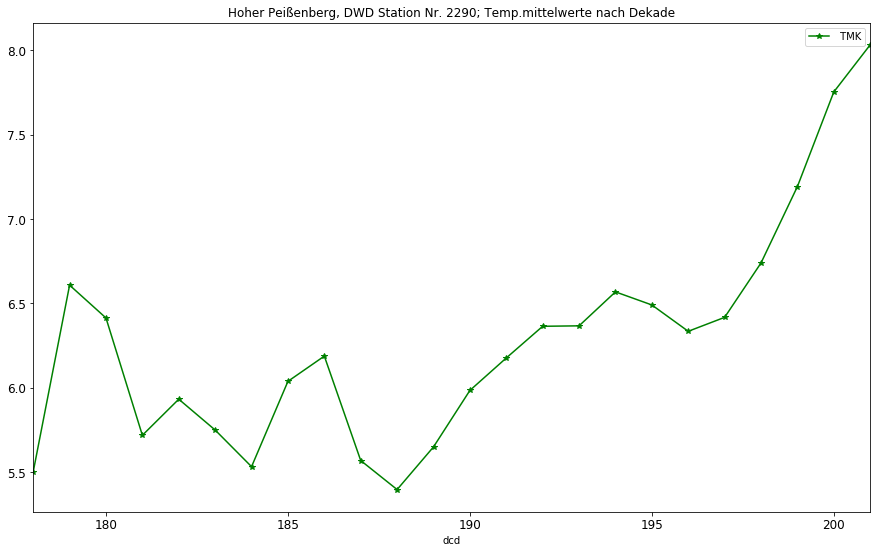

In [55]:
ax6 = df4.plot(kind='line',
              y=' TMK',
              title ="Hoher Peißenberg, DWD Station Nr. 2290; Temp.mittelwerte nach Dekade",
              figsize=(15,9),
              legend=True,
              color='green',
              style='*-',
              fontsize=12)
ax2.set_xlabel("Dekade",fontsize=12)
ax2.set_ylabel("Temperatur [°C]",fontsize=12)
#ax4 = df.reset_index().plot.line( y='TXK_m5a', color='red',  ax=ax2)
#ax5 = df.reset_index().plot.line( y='TNK_m5a', color='blue', ax=ax2)
plt.show()

### Auswertung nach Mittelwert pro Jahr

In [56]:
df5= df.groupby('y').count()[['MESS_DATUM']]
df5.rename(columns={"MESS_DATUM": "count"},inplace=True)
df5['Jahresmittel']  = df.groupby('y').mean()[[' TMK']]
df5.tail()

,count,Jahresmittel
y,,
2014,365,8.526849
2015,365,8.885205
2016,366,8.163934
2017,365,8.053699
2018,365,9.027671


Berechnung von geglätteten Mitteln über 10 bzw 30 Jahre

In [57]:
df5['Glättung_10a'] = df5['Jahresmittel'].rolling(window=10).mean()
df5['Glättung_30a'] = df5['Jahresmittel'].rolling(window=30).mean()

Grafik erzeugen

Text(0, 0.5, 'Temperatur [°C]')

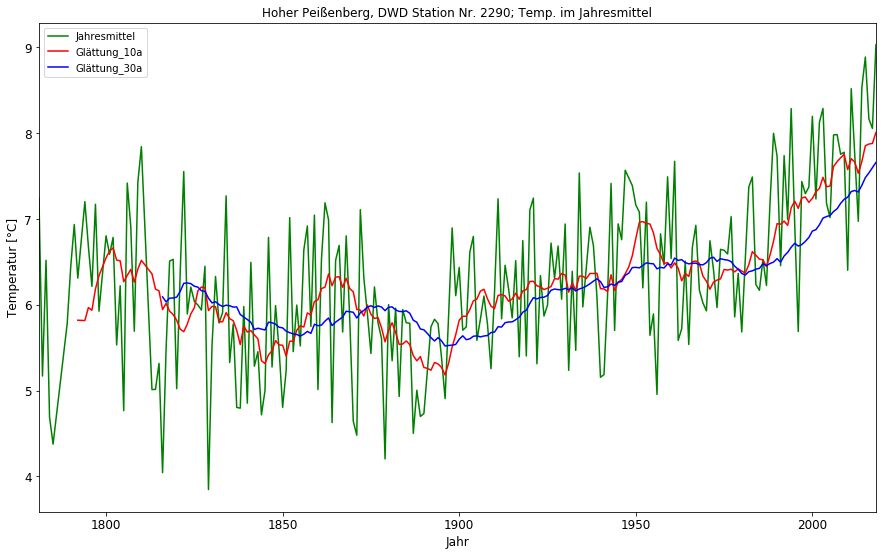

In [58]:
ax6 = df5.plot(kind='line',
              y='Jahresmittel',
              title ="Hoher Peißenberg, DWD Station Nr. 2290; Temp. im Jahresmittel",
              figsize=(15,9),
              legend=True,
              color='green',
              fontsize=12)
ax7 = df5.reset_index().plot.line( x='y', y='Glättung_10a', color='red',  ax=ax6)
ax8 = df5.reset_index().plot.line( x='y', y='Glättung_30a', color='blue', ax=ax6)
ax6.set_xlabel("Jahr",fontsize=12)
ax6.set_ylabel("Temperatur [°C]",fontsize=12)

## Fazit

Die mittlere Temperatur war auf dem Hohen Peißenberg lange Zeit stabil und bewegte sich im Korridor zwischen 5.0 und 7.0°C. Seit dem Zeitraum der 1970er Jahre zeigt sich ein steter Aufwärtstrend, über den der Verlauf der Meßkurve den früheren Schwankungsbereich nach oben verlassen hat, mit einer Steigung von ca.0,5°C pro Dekade.